In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [8]:
boston_dos = load_boston()

In [9]:
boston_dos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

CRIM tasa de criminalidad per cápita por ciudad

Proporción ZN de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

Proporción INDUS de acres de negocios no minoristas por ciudad

Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)

Concentración de óxidos nítricos NOX (partes por 10 millones)

RM promedio de habitaciones por vivienda

EDAD proporción de unidades ocupadas por el propietario construidas antes de 1940

Distancias ponderadas por DIS a cinco centros de empleo de Boston

Índice RAD de accesibilidad a carreteras radiales

IMPUESTO tasa de impuesto a la propiedad de valor total por $ 10,000

PTRATIO relación alumno-profesor por localidad

B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad

LSTAT% menor estado de la población

MEDV Valor medio de viviendas ocupadas por sus propietarios en $ 1000

In [10]:
x = boston_dos.data
y = boston_dos.target
columns = boston_dos.feature_names

In [11]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
y 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
boston_data = pd.DataFrame(x)
boston_data.columns = columns

In [14]:
boston_data.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [17]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [18]:
boston_data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1      

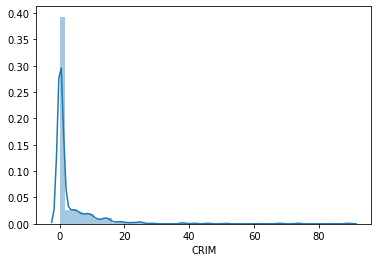

In [20]:
 sns.distplot(boston_data['CRIM'], hist = True)

In [28]:
 y = list(list_columns)

In [23]:
list_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
list_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
y

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

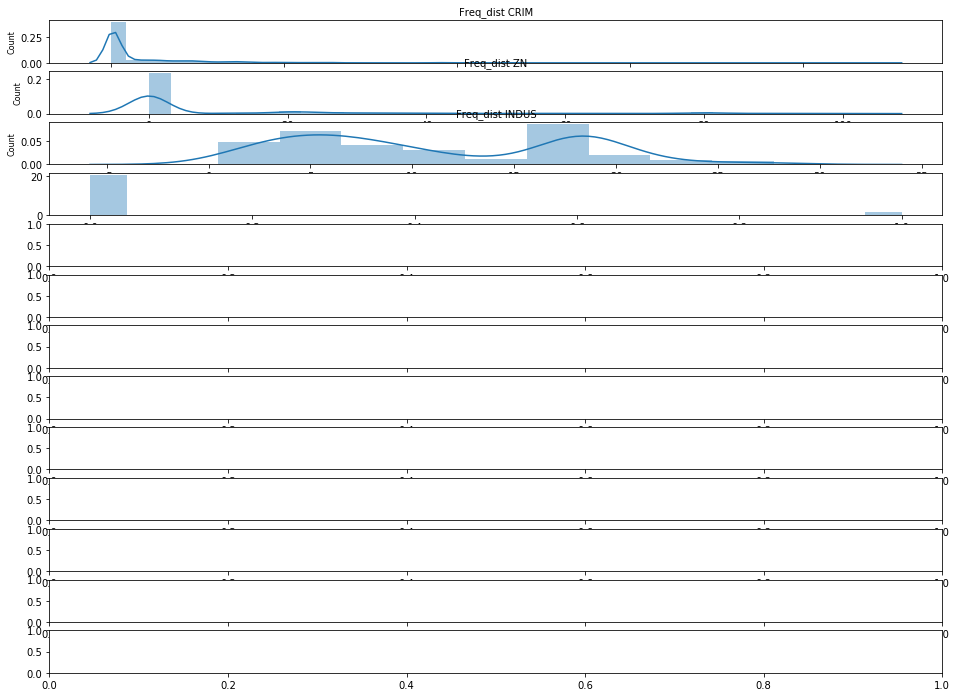

In [32]:

fig, ax = plt.subplots(len(y), figsize = (16,12))
for i, col_val in enumerate(y):
    
    sns.distplot(boston_data[col_val], hist = True, ax = ax[i])
    ax[i].set_title('Freq_dist ' +col_val, fontsize = 10)
    ax[i].set_xlabel(col_val, fontsize = 8)
    ax[i].set_ylabel('Count', fontsize = 8)

In [33]:
boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

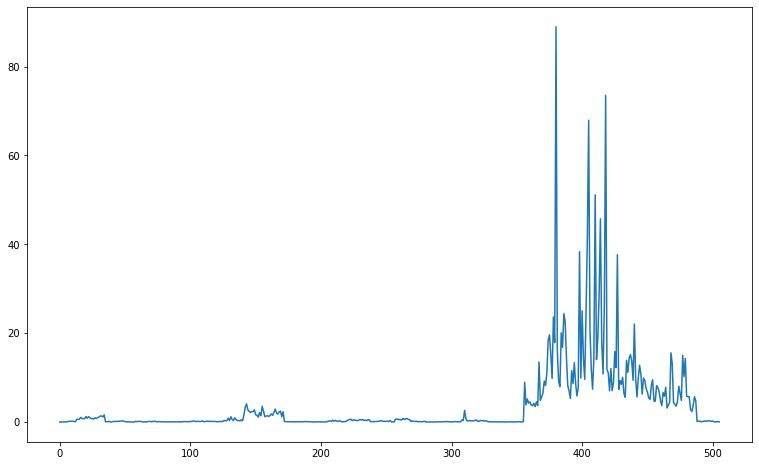

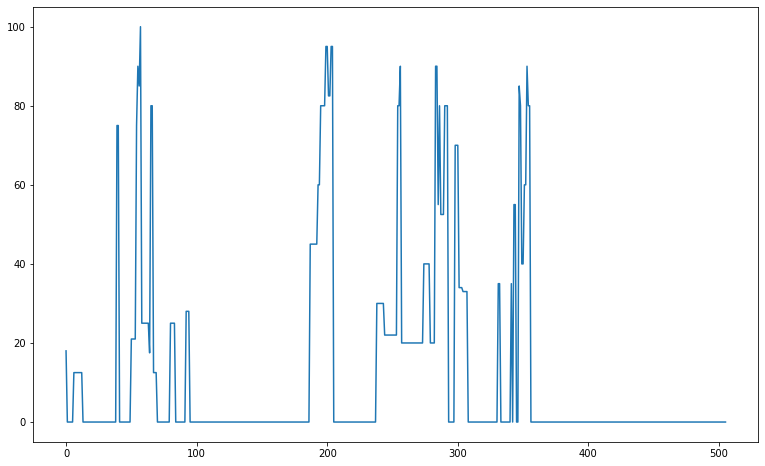

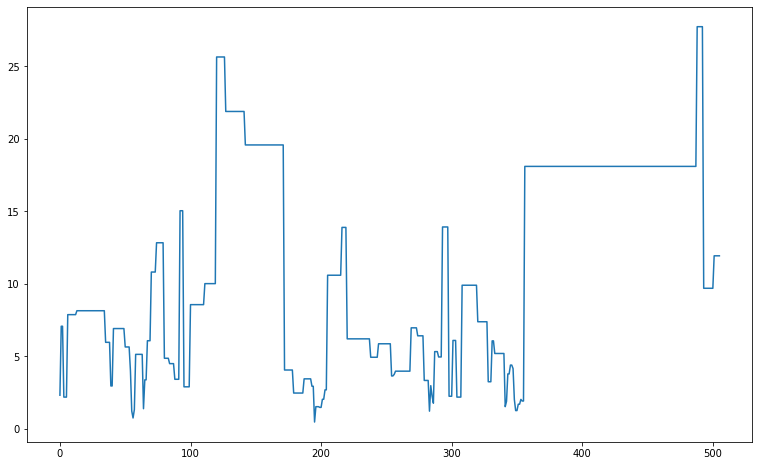

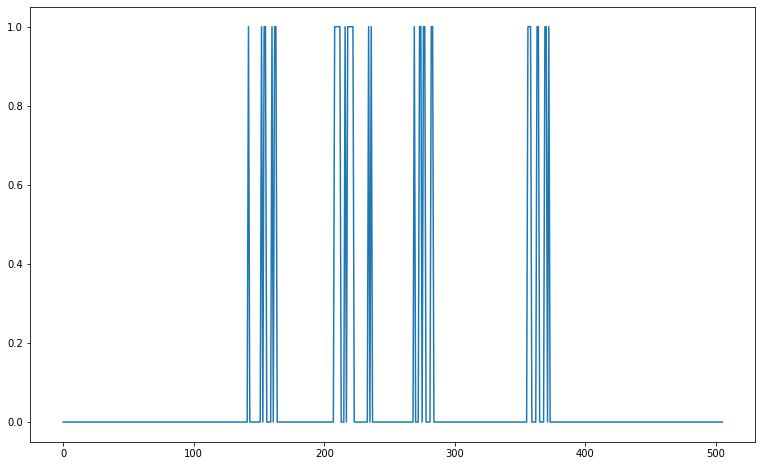

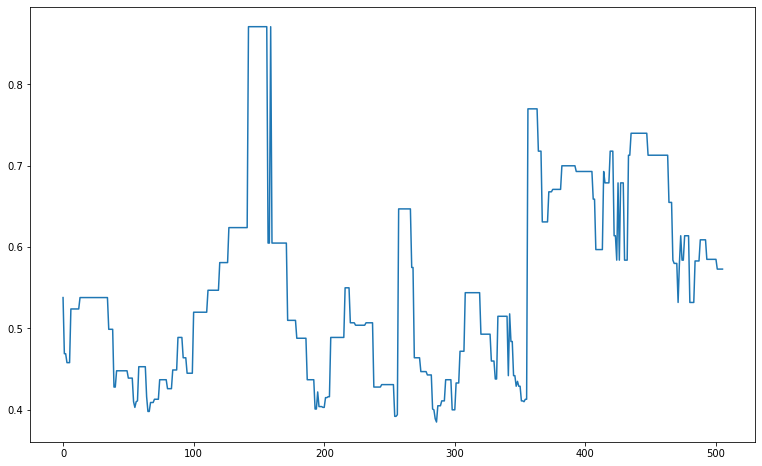

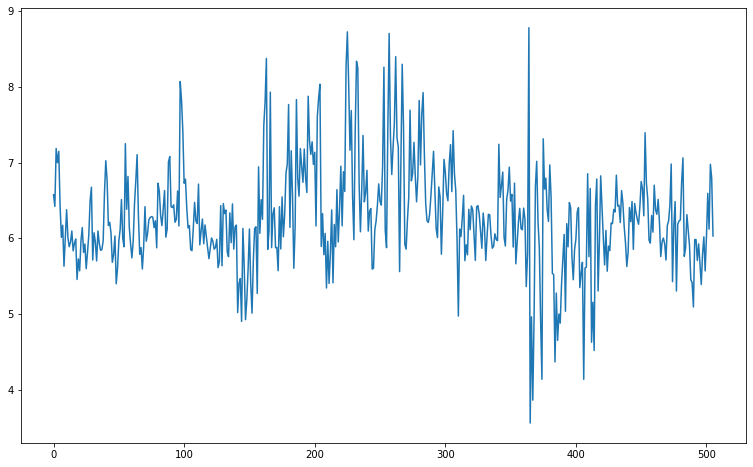

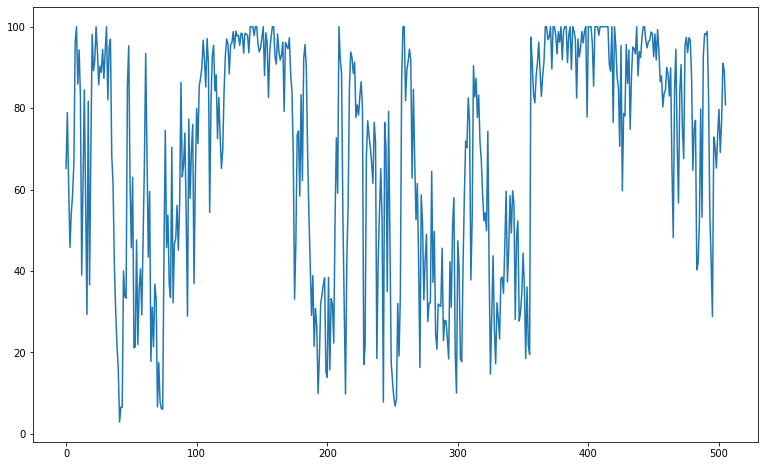

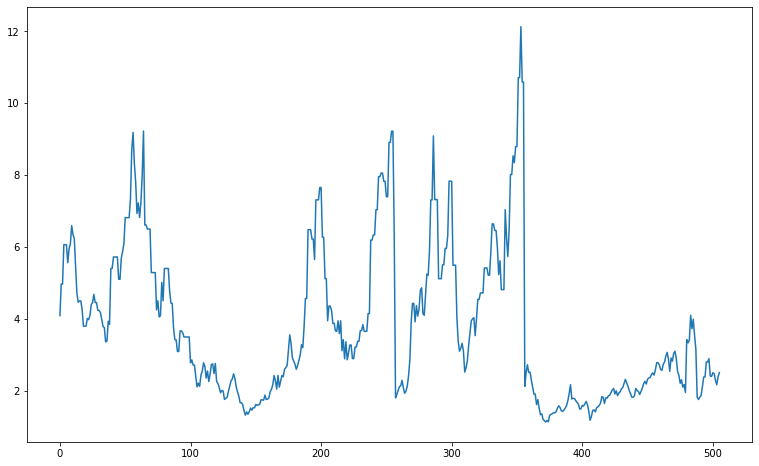

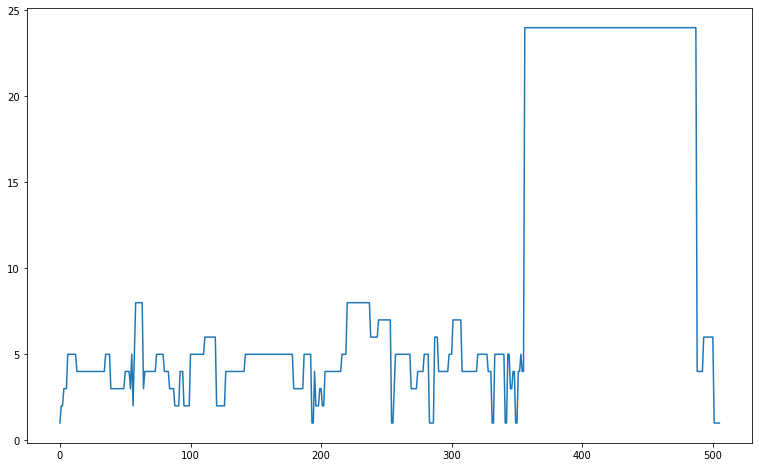

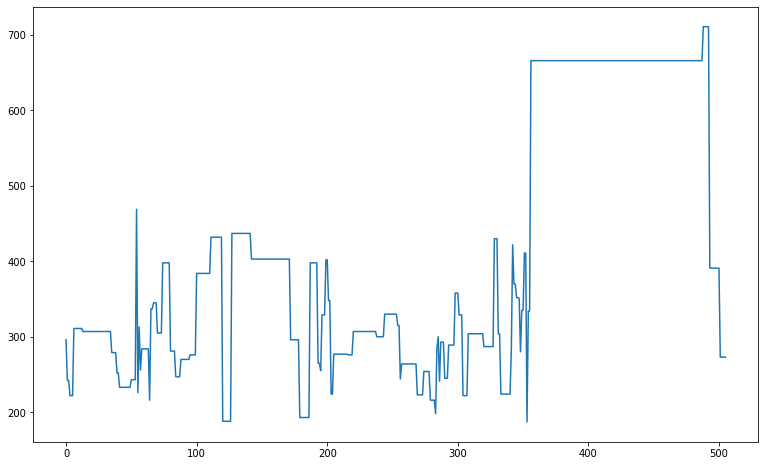

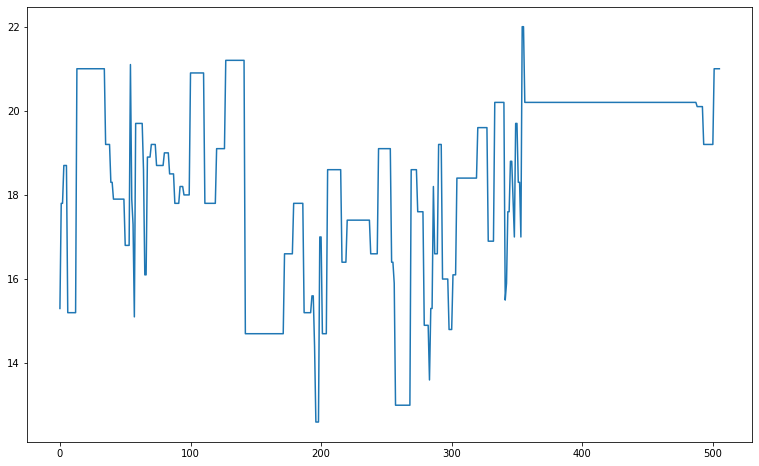

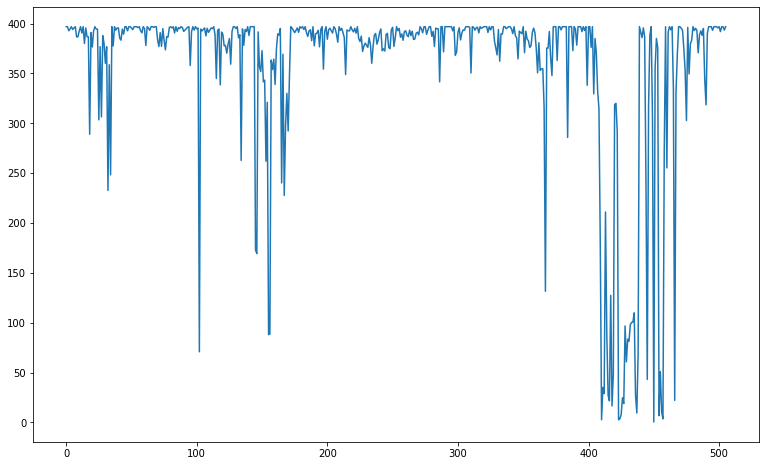

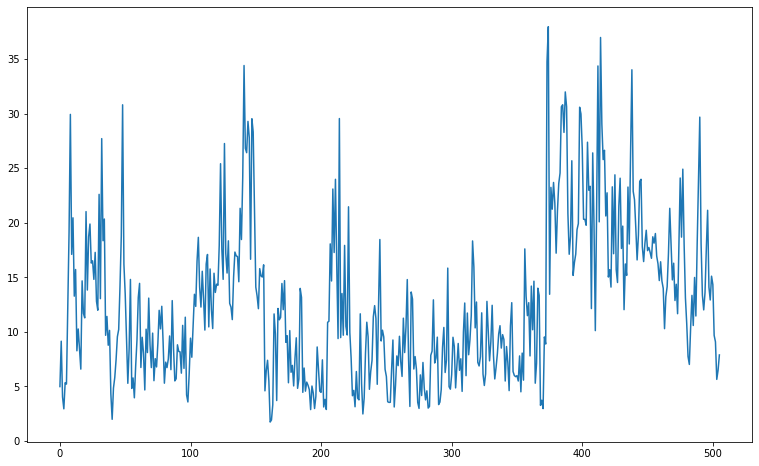

In [34]:
for i in y:
    plt.figure(figsize=(13,8))
    plt.plot(boston_data[i])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f866fcfdf50>,
      dtype=object)

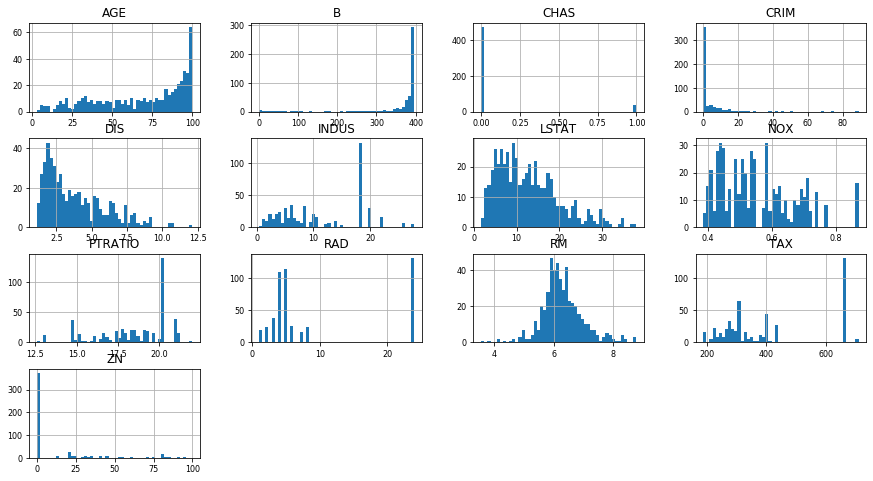

In [35]:
boston_data.hist(figsize=(15,8), bins= 50, xlabelsize=8, ylabelsize=8)

In [36]:
y

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

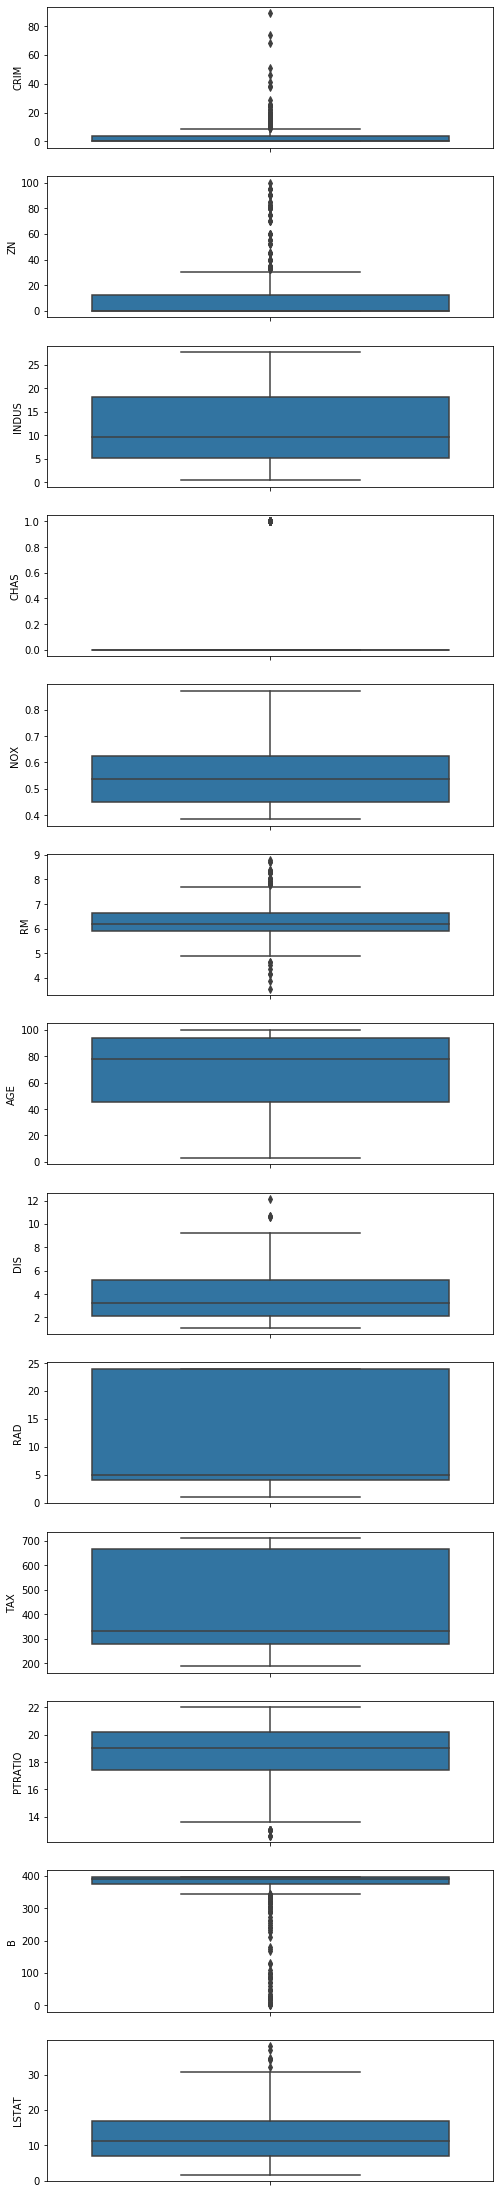

In [37]:
fig, ax = plt.subplots(len(y), figsize = (8,40))
for i, val in enumerate(y):
    sns.boxplot(y = boston_data[val], ax = ax[i])
plt.show()

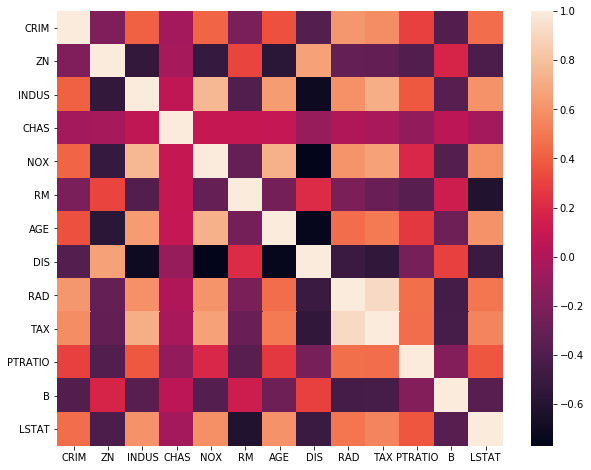

In [38]:
f, ax = plt.subplots(figsize=(10,8))
corr = boston_data.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [39]:

z = np.abs(stats.zscore(boston_data))

In [40]:
z


array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [43]:
boston_data.shape

(506, 13)

In [44]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [45]:
data_boston_outlier_Zscore = boston_data[(z < 3).all(axis = 1)]

In [46]:
data_boston_outlier_Zscore

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(data_boston_outlier_Zscore) 
scaler_data = scaler.transform(data_boston_outlier_Zscore) 
scaler_data

array([[-0.50009668,  0.42727822, -1.25466328, ..., -1.48379449,
         0.43991388, -1.1282211 ],
       [-0.49580542, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.43991388, -0.48493501],
       [-0.49580951, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.36091635, -1.27512537],
       ...,
       [-0.4889668 , -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -1.02616129],
       [-0.47898384, -0.48858069,  0.16203913, ...,  1.18595212,
         0.37295037, -0.89626698],
       [-0.49169611, -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -0.67977647]])

In [50]:
scaled_boston = pd.DataFrame(scaler_data)
scaled_boston.columns = y

In [51]:
scaled_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.500097,0.427278,-1.254663,0.0,-0.083120,0.503296,-0.077906,0.120954,-0.938612,-0.607776,-1.483794,0.439914,-1.128221
1,-0.495805,-0.488581,-0.553675,0.0,-0.708718,0.251194,0.410713,0.567909,-0.816465,-0.943176,-0.312853,0.439914,-0.484935
2,-0.495810,-0.488581,-0.553675,0.0,-0.708718,1.501880,-0.224135,0.567909,-0.816465,-0.943176,-0.312853,0.360916,-1.275125
3,-0.494771,-0.488581,-1.273808,0.0,-0.808451,1.195757,-0.769819,1.125951,-0.694319,-1.067398,0.108686,0.395854,-1.443679
4,-0.487272,-0.488581,-1.273808,0.0,-0.808451,1.439673,-0.470228,1.125951,-0.694319,-1.067398,0.108686,0.439914,-1.074098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,-0.488584,-0.488581,0.162039,0.0,0.234212,0.532762,0.061190,-0.700185,-0.938612,-0.750631,1.185952,0.344612,-0.402978
411,-0.492134,-0.488581,0.162039,0.0,0.234212,-0.241550,0.332249,-0.797567,-0.938612,-0.750631,1.185952,0.439914,-0.494213
412,-0.488967,-0.488581,0.162039,0.0,0.234212,1.159742,0.842267,-0.858716,-0.938612,-0.750631,1.185952,0.439914,-1.026161
413,-0.478984,-0.488581,0.162039,0.0,0.234212,0.861804,0.781636,-0.745895,-0.938612,-0.750631,1.185952,0.372950,-0.896267


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
pca.fit(scaled_boston)
x_pca = pca.transform(scaled_boston)
x_pca

array([[-2.08568157e+00, -4.02315873e-01,  1.21168776e+00, ...,
         6.28837971e-02,  3.96070432e-01,  5.56990105e-17],
       [-1.43407557e+00, -9.62625146e-01,  2.92327601e-02, ...,
         1.85173081e-01, -3.55687196e-02,  5.12877116e-17],
       [-2.10152887e+00, -4.05422871e-01,  8.42152136e-01, ...,
         3.76932769e-01,  7.55506099e-02,  4.97043773e-17],
       ...,
       [-2.96152115e-01, -1.29295148e+00,  6.81290193e-01, ...,
         4.85623251e-01,  1.57483276e-01, -2.61844293e-16],
       [-2.39364400e-01, -1.31192920e+00,  4.39291343e-01, ...,
         5.02767504e-01,  1.47482751e-01, -2.75819164e-16],
       [-6.17599757e-02, -1.51690031e+00, -4.59861784e-01, ...,
         4.33783438e-01,  8.91253731e-02, -3.31333462e-16]])

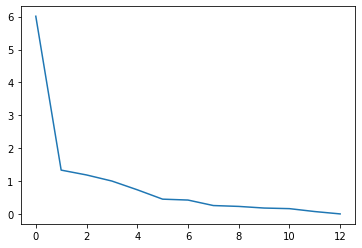

In [54]:
plt.plot(pca.explained_variance_) 

In [55]:
x_pca

array([[-2.08568157e+00, -4.02315873e-01,  1.21168776e+00, ...,
         6.28837971e-02,  3.96070432e-01,  5.56990105e-17],
       [-1.43407557e+00, -9.62625146e-01,  2.92327601e-02, ...,
         1.85173081e-01, -3.55687196e-02,  5.12877116e-17],
       [-2.10152887e+00, -4.05422871e-01,  8.42152136e-01, ...,
         3.76932769e-01,  7.55506099e-02,  4.97043773e-17],
       ...,
       [-2.96152115e-01, -1.29295148e+00,  6.81290193e-01, ...,
         4.85623251e-01,  1.57483276e-01, -2.61844293e-16],
       [-2.39364400e-01, -1.31192920e+00,  4.39291343e-01, ...,
         5.02767504e-01,  1.47482751e-01, -2.75819164e-16],
       [-6.17599757e-02, -1.51690031e+00, -4.59861784e-01, ...,
         4.33783438e-01,  8.91253731e-02, -3.31333462e-16]])

In [56]:
pca.explained_variance_

array([6.01248429e+00, 1.33247388e+00, 1.18516853e+00, 1.00000362e+00,
       7.34102336e-01, 4.48909223e-01, 4.21815507e-01, 2.54712727e-01,
       2.28377083e-01, 1.78656495e-01, 1.60474620e-01, 7.18071940e-02,
       2.58245759e-34])